# Observability facilities

Third party software stack to keep an eye on your experiment or gather some metrics.

---

- Website: https://discovery.gitlabpages.inria.fr/enoslib/index.html
- Instant chat: https://framateam.org/enoslib
- Source code: https://gitlab.inria.fr/discovery/enoslib


---

More generally, useful service for the experimentation are consolidated through `Services`.
In particular, EnOSlib has some some Services which deal with the problem of getting some insight on what's running on remote nodes. 

A Service is a python object which exposes three main methods:

- `deploy`: which deploy the service
- `destroy`: remove stop the service
- `backup`: retrieve some states of the services (e.g monitoring information)

Usually a service is used as follow:

```python
service = Service(*args, **kwargs)
service.deploy()
...
# do stuffs
...
service.backup()
service.destroy()
```


But it's sometime useful to use a Context Manager when working with module:

```python
with Service(*args, **kwargs) as service:
    ...
    # do stuffs
    ...
```

This allows for

- running the service for some time depending on what's inside the context manager
- cleaning (and backuping) stuffs automatically at the end

---

**Prerequisites:**
- A Grid'5000 account
- A working EnOSlib environment and Jupyter (not included in EnOSlib dependencies, but `pip install jupyterlab` will install it)
- Some visualization tools: `matplotlib`, `seaborn`
- Packet manipulation tool: `scapy`




## Common setup

In [1]:
import enoslib as en

# Enable rich logging
_ = en.init_logging()

Note: Openstack clients not installed


In [2]:
# claim the resources
network = en.G5kNetworkConf(type="prod", roles=["my_network"], site="rennes")

conf = (
    en.G5kConf.from_settings(job_type="allow_classic_ssh", job_name="enoslib_observability")
    .add_network_conf(network)
    .add_machine(
        roles=["control", "xp"], cluster="parasilo", nodes=1, primary_network=network
    )
    .add_machine(
        roles=["agent", "xp"], cluster="parasilo", nodes=1, primary_network=network
    )
    .finalize()
)
conf

Conf@0x7f22292f40a0
{
    "dhcp": true,
    "force_deploy": false,
    "env_name": "debian11-x64-nfs",
    "job_name": "enoslib_observability",
    "job_type": "allow_classic_ssh",
    "key": "/home/msimonin/.ssh/id_rsa.pub",
    "queue": "default",
    "walltime": "02:00:00",
    "resources": {
        "machines": [
            {
                "roles": [
                    "control",
                    "xp"
                ],
                "primary_network": "39892d07-de61-4e58-8888-c5b0cc1b03b5",
                "secondary_networks": [],
                "cluster": "parasilo",
                "nodes": 1
            },
            {
                "roles": [
                    "agent",
                    "xp"
                ],
                "primary_network": "39892d07-de61-4e58-8888-c5b0cc1b03b5",
                "secondary_networks": [],
                "cluster": "parasilo",
                "nodes": 1
            }
        ],
        "networks": [
            {
                "id": "39892d07-de61-4e58-8888-c5b0cc1b03b5",
                "type": "prod",
                "roles": [
                    "my_network"
                ],
                "site": "rennes"
            }
        ]
    }
}

In [3]:
provider = en.G5k(conf)
roles, networks = provider.init()
roles

INFO     Reloading enoslib_observability from grenoble                   ]8;id=984047;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=274134;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_observability from lille                      ]8;id=944417;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=697910;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_observability from luxembourg                 ]8;id=59479;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=166624;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_observability from lyon                       ]8;id=924134;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=729866;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_observability from nantes                     ]8;id=123598;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=158105;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_observability from rennes                     ]8;id=588331;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=955668;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading 1870616 from rennes                                   ]8;id=583923;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=839932;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#180\180]8;;\

INFO     Reloading enoslib_observability from sophia                     ]8;id=371872;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=119328;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Waiting for 1870616 on rennes [2022-01-18 14:19:24]             ]8;id=942280;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=832630;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#317\317]8;;\

INFO     All jobs are Running !                                          ]8;id=545758;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=761969;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#324\324]8;;\

{'control': [Host(address='parasilo-13.rennes.grid5000.fr', alias='parasilo-13.rennes.grid5000.fr', user='root', keyfile=None, port=None, extra={}, net_devices=set())], 'xp': [Host(address='parasilo-13.rennes.grid5000.fr', alias='parasilo-13.rennes.grid5000.fr', user='root', keyfile=None, port=None, extra={}, net_devices=set()), Host(address='parasilo-17.rennes.grid5000.fr', alias='parasilo-17.rennes.grid5000.fr', user='root', keyfile=None, port=None, extra={}, net_devices=set())], 'agent': [Host(address='parasilo-17.rennes.grid5000.fr', alias='parasilo-17.rennes.grid5000.fr', user='root', keyfile=None, port=None, extra={}, net_devices=set())]}

### A simple load generator

We'll install a simple load generator: `stress` available in the debian packages.

In [4]:
with en.actions(roles=roles["agent"]) as a:
    a.apt(name="stress", state="present")

[WARNING]: No inventory was parsed, only implicit localhost is available


Output()

Finished 1 tasks (apt)

─────────────────────────────────────────────────────────────────────────────────────────────

## Monitoring with dstat

Dstat is a simple monitoring tool: https://github.com/dstat-real/dstat#information
It runs as a single process and collect metrics from various sources. 
That makes it a good candidate for getting a quick insight on the resources consumptions during an experiment.


The EnOSlib implementation lets you easily 
- start Dstat processes on remote machine and start dumping the metrics into a csv file( it's the purpose `deploy` method of the Dstat service)
- retrieve all the csvs file (one per remote node) on your local machine ( that's the purpose of the `backup` method)
- stop every remote Dstat processes (that's the purpose of the `destroy` method)

### Capture

Let's start with a single capture implemented using a context manager.
The context manager runs `deploy` when entering, and `backup/destroy` when exiting.

In [5]:
# Start a capture on all nodes
# - stress on some nodes
import time
with en.Dstat(nodes=roles["xp"]) as d:
    time.sleep(5)
    en.run_command("stress --cpu 4 --timeout 10", roles=roles["agent"])
    time.sleep(5)
    backup_dir = d.backup_dir

Output()

Finished 1 tasks ((tmux list-panes -t __enoslib_dstat__ -F '#{pane_pid}' | xargs -n1 kill -2)
|| true)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 4 tasks (apt,file,get_url,Running dstat with the options -aT -o 
1642512113050267851-dstat.csv)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 1 tasks (stress --cpu 4 --timeout 10)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 1 tasks ((tmux list-panes -t __enoslib_dstat__ -F '#{pane_pid}' | xargs -n1 kill -2)
|| true)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 1 tasks (Fetching the dstat output)

─────────────────────────────────────────────────────────────────────────────────────────────

### Visualization

All the CSVs files are available under the `backup_dir` inside subdirectories named after the corresponding remote host alias:
```bash
<backup_sir> / host1 / ... / <metrics>.csv
             / host2 / ..../ <metrics>.csv
```
The following bunch of python lines will recursively look for any csv file inside these directories and build a DataFrame and a visualization

In [6]:
import pandas as pd
import seaborn as sns 

print(backup_dir)
#Create a dictionnary of (alias) -> list of pandas df
result = pd.DataFrame()
for host in roles["xp"]:
    host_dir = backup_dir / host.alias
    csvs = host_dir.rglob("*.csv")
    for csv in csvs:
        print(csv)
        df = pd.read_csv(csv, skiprows=5, index_col=False)
        df["host"] = host.alias
        df["csv"] = csv
        result = pd.concat([result, df], axis=0, ignore_index=True)

result

/home/msimonin/workspace/repos/enoslib/docs/jupyter/__enoslib_dstat__/1642512113050267851
/home/msimonin/workspace/repos/enoslib/docs/jupyter/__enoslib_dstat__/1642512113050267851/parasilo-13.rennes.grid5000.fr/tmp/__enoslib_dstat__/1642512113050267851/1642512113050267851-dstat.csv
/home/msimonin/workspace/repos/enoslib/docs/jupyter/__enoslib_dstat__/1642512113050267851/parasilo-17.rennes.grid5000.fr/tmp/__enoslib_dstat__/1642512113050267851/1642512113050267851-dstat.csv


,usr,sys,idl,wai,stl,read,writ,recv,send,in,...,csw,run,blk,new,1m,5m,15m,epoch,host,csv
0,0.316,0.251,98.416,1.017,0,1424937.694,3166853.564,0,0,0,...,1611.565,0,0,37.310,0.47,0.81,0.49,1.642512e+09,parasilo-13.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
1,0.000,0.000,99.813,0.187,0,0.000,2097152.000,1074,1164,0,...,149.000,0,0,3.000,0.47,0.81,0.49,1.642512e+09,parasilo-13.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
2,0.000,0.000,99.906,0.094,0,0.000,2248704.000,0,0,0,...,178.000,0,0,0.000,0.47,0.81,0.49,1.642512e+09,parasilo-13.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
3,0.000,0.031,99.812,0.156,0,0.000,2097152.000,472,0,0,...,119.000,0,0,0.000,0.47,0.81,0.49,1.642512e+09,parasilo-13.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
4,0.031,0.000,99.719,0.250,0,0.000,4259840.000,166,180,0,...,403.000,0,0,0.000,0.47,0.81,0.49,1.642512e+09,parasilo-13.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
5,0.000,0.000,99.938,0.062,0,0.000,2097152.000,272,0,0,...,173.000,0,0,0.000,0.43,0.80,0.48,1.642512e+09,parasilo-13.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
6,0.000,0.000,99.938,0.062,0,0.000,2097152.000,0,0,0,...,137.000,0,0,0.000,0.43,0.80,0.48,1.642512e+09,parasilo-13.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
7,0.062,0.031,99.875,0.031,0,0.000,2097152.000,612,0,0,...,1029.000,0,0,0.000,0.43,0.80,0.48,1.642512e+09,parasilo-13.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
8,0.000,0.000,99.906,0.094,0,0.000,2109440.000,166,180,0,...,92.000,0,0,0.000,0.43,0.80,0.48,1.642512e+09,parasilo-13.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...
9,0.346,0.220,99.214,0.220,0,0.000,4194304.000,2228,47878,0,...,7134.000,0,0,0.000,0.43,0.80,0.48,1.642512e+09,parasilo-13.rennes.grid5000.fr,/home/msimonin/workspace/repos/enoslib/docs/ju...


<AxesSubplot:xlabel='epoch', ylabel='usr'>

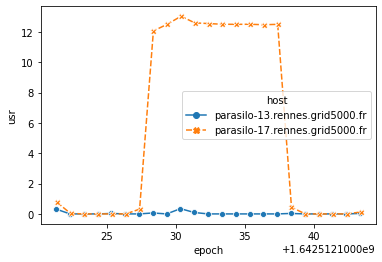

In [7]:
# let's show the metrics !
sns.lineplot(data=result, x="epoch", y="usr", hue="host", markers=True, style="host")

## Packet sniffing with tcpdump

### Capture

In [8]:
# start a capture
# - on all the interface configured on the my_network network
# - we dump icmp traffic only
# - for the duration of the commands (here a client is pigging the server)
with en.TCPDump(
    hosts=roles["xp"], ifnames=["any"], options="icmp"
) as t:
    backup_dir = t.backup_dir
    _ = en.run(f"ping -c10 {roles['control'][0].address}", roles["agent"])

Output()

Finished 3 tasks (Stopping tcpdump on any,debug,Stopping some tcpdumps)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 5 tasks (Install dependencies (tcpdump, tmux ...),Create output directory,tcpdump 
for any,debug,tcpdump on some interfaces)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 1 tasks (ping -c10 parasilo-13.rennes.grid5000.fr)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 3 tasks (Stopping tcpdump on any,debug,Stopping some tcpdumps)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 2 tasks (tar -czf tcpdump.tar.gz /tmp/__enoslib_tcpdump__,fetch)

─────────────────────────────────────────────────────────────────────────────────────────────

### Visualization

In [9]:
from scapy.all import rdpcap
import tarfile
# Examples:
# create a dictionnary of (alias, if) -> list of decoded packets by scapy
decoded_pcaps = dict()
for host in roles["control"]:
    host_dir = backup_dir / host.alias
    t = tarfile.open(host_dir / "tcpdump.tar.gz")
    t.extractall(host_dir / "extracted")
    # get all extracted pcap for this host
    pcaps = (host_dir / "extracted").rglob("*.pcap")
    for pcap in pcaps:
        decoded_pcaps.setdefault((host.alias, pcap.with_suffix("").name),
                                 rdpcap(str(pcap)))

# Displaying some packets
for (host, ifs), packets in decoded_pcaps.items():
    print(host, ifs)
    packets[0].show()
    packets[1].show()

WARNING  PcapReader: unknown LL type [276]/[0x114]. Using Raw packets            ]8;id=349907;file:///home/msimonin/.pyenv/versions/3.9.2/envs/enoslib/lib/python3.9/site-packages/scapy/error.py\error.py]8;;\:]8;id=43693;file:///home/msimonin/.pyenv/versions/3.9.2/envs/enoslib/lib/python3.9/site-packages/scapy/error.py#150\150]8;;\

parasilo-13.rennes.grid5000.fr any
###[ Raw ]### 
  load      = '\x08\x00\x00\x00\x00\x00\x00\x04\x00\x01\x00\x06\\xec\\xf4\\xbb\\xd1\x01\\xb8\x00\x00E\x00\x00T\\xb8\\xb9@\x00@\x01g\\xb0\\xac\x10a\x11\\xac\x10a\r\x08\x00j\\x85+\\xcf\x00\x01\x1b\\xbf\\xe6a\x00\x00\x00\x00\\x97\\xb6\t\x00\x00\x00\x00\x00\x10\x11\x12\x13\x14\x15\x16\x17\x18\x19\x1a\x1b\x1c\x1d\x1e\x1f !"#$%&\'()*+,-./01234567'

###[ Raw ]### 
  load      = '\x08\x00\x00\x00\x00\x00\x00\x06\x00\x01\x00\x06\\xec\\xf4\\xbb\\xd1\x01\\xb8\x00\x00E\x00\x00T\\xb8\\xb9@\x00@\x01g\\xb0\\xac\x10a\x11\\xac\x10a\r\x08\x00j\\x85+\\xcf\x00\x01\x1b\\xbf\\xe6a\x00\x00\x00\x00\\x97\\xb6\t\x00\x00\x00\x00\x00\x10\x11\x12\x13\x14\x15\x16\x17\x18\x19\x1a\x1b\x1c\x1d\x1e\x1f !"#$%&\'()*+,-./01234567'



### Capture on a specific network

You can start a capture on a dedicated network by specifying it to TCPDump
This will sniff all the packet that go through an interface configured in this specific network
You need to call `sync_info` first to enable the translation (network logical name)->interface name

In [10]:
roles = en.sync_info(roles, networks)

Output()

Finished 1 tasks (hostname)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 6 tasks (Gathering Facts,setup,utils : include,utils : Dump network information in a
file,utils : Create the fake interfaces)

─────────────────────────────────────────────────────────────────────────────────────────────

In [11]:
# start a capture
# - on all the interface configured on the my_network network
# - we dump icmp traffic only
# - for the duration of the commands (here a client is pigging the server)
with en.TCPDump(
    hosts=roles["xp"], networks=networks["my_network"], options="icmp"
) as t:
    backup_dir = t.backup_dir
    _ = en.run(f"ping -c10 {roles['control'][0].address}", roles["agent"])

Output()

Finished 2 tasks (debug,Stopping some tcpdumps)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 4 tasks (Install dependencies (tcpdump, tmux ...),Create output 
directory,debug,tcpdump on some interfaces)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 1 tasks (ping -c10 parasilo-13.rennes.grid5000.fr)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 2 tasks (debug,Stopping some tcpdumps)

─────────────────────────────────────────────────────────────────────────────────────────────

Output()

Finished 2 tasks (tar -czf tcpdump.tar.gz /tmp/__enoslib_tcpdump__,fetch)

─────────────────────────────────────────────────────────────────────────────────────────────

## Monitoring with Telegraf/[InfluxDB|prometheus]/grafana 

In [12]:
monitoring = en.TIGMonitoring(collector=roles["control"][0], agent=roles["agent"], ui=roles["control"][0])
monitoring

In [13]:
monitoring.deploy()

Output()

[WARNING]: Could not match supplied host pattern, ignoring: prometheus

Finished 38 tasks (Gathering Facts,Gather facts on all hosts,python3 : Install python3,docker
: Install docker,docker : Installing python-docker,telegraf : include,telegraf : Host 
architecture,telegraf : include_tasks,telegraf : Detecting GPU and specific runtime,telegraf 
: To support GPU metrics you need an nvidia card and the nvidia-container-toolkit 
installed,telegraf : (gpu) Preparing agents,telegraf : (non gpu) Preparing agents,telegraf : 
Creating remote directory,telegraf : Generating the configuration file,telegraf : Installing 
Telegraf,influxdb : include,influxdb : Installing InfluxDB,influxdb : Waiting for InfluxDB to
be ready,grafana : include,grafana : Installing Grafana,grafana : Waiting for grafana to be 
ready,grafana : Add Collector (Influxdb) in Grafana,grafana : Add Collector (Prometheus) in 
Grafana)

─────────────────────────────────────────────────────────────────────────────────────────────

In [14]:
en.run_command("stress --cpu 4 --timeout 60", roles=roles["agent"], background=True)

Output()

Finished 1 tasks (stress --cpu 4 --timeout 60)

─────────────────────────────────────────────────────────────────────────────────────────────

AsyncCommandResult(host='parasilo-17.rennes.grid5000.fr', task='stress --cpu 4 --timeout 60', status='OK', payload={'started': 1, 'finished': 0, 'ansible_job_id': '536562860575.19468', 'results_file': '/root/.ansible_async/536562860575.19468', 'changed': True, '_ansible_no_log': False})

In [15]:
# create a tunnel to the service running inside g5k
tunnel = en.G5kTunnel(address=monitoring.ui.address, port=3000)
local_address, local_port, _ = tunnel.start()
print(f"The service is running at http://localhost:{local_port} (admin:admin)")

2022-01-18 14:26:06,833| ERROR   | Password is required for key /home/msimonin/.ssh/id_rsa


ERROR    Password is required for key /home/msimonin/.ssh/id_rsa            ]8;id=571706;file:///home/msimonin/.pyenv/versions/3.9.2/envs/enoslib/lib/python3.9/site-packages/sshtunnel.py\sshtunnel.py]8;;\:]8;id=653626;file:///home/msimonin/.pyenv/versions/3.9.2/envs/enoslib/lib/python3.9/site-packages/sshtunnel.py#1314\1314]8;;\

INFO     Connected (version 2.0, client OpenSSH_7.4p1)                      ]8;id=433233;file:///home/msimonin/.pyenv/versions/3.9.2/envs/enoslib/lib/python3.9/site-packages/paramiko/transport.py\transport.py]8;;\:]8;id=994341;file:///home/msimonin/.pyenv/versions/3.9.2/envs/enoslib/lib/python3.9/site-packages/paramiko/transport.py#1819\1819]8;;\

INFO     Authentication (publickey) successful!                             ]8;id=770530;file:///home/msimonin/.pyenv/versions/3.9.2/envs/enoslib/lib/python3.9/site-packages/paramiko/transport.py\transport.py]8;;\:]8;id=764321;file:///home/msimonin/.pyenv/versions/3.9.2/envs/enoslib/lib/python3.9/site-packages/paramiko/transport.py#1819\1819]8;;\

The service is running at http://localhost:33013 (admin:admin)


In [16]:
# don't forget to close it
tunnel.close()

To not forget to close the tunnel you can use a context manager: the tunnel will be closed automatically when exiting the context manager.

In [17]:
import time
with en.G5kTunnel(address=monitoring.ui.address, port=3000) as (_, local_port, _):
    print(f"The service is running at http://localhost:{local_port}")
    time.sleep(60)
    

2022-01-18 14:26:07,231| ERROR   | Password is required for key /home/msimonin/.ssh/id_rsa


ERROR    Password is required for key /home/msimonin/.ssh/id_rsa            ]8;id=291788;file:///home/msimonin/.pyenv/versions/3.9.2/envs/enoslib/lib/python3.9/site-packages/sshtunnel.py\sshtunnel.py]8;;\:]8;id=327729;file:///home/msimonin/.pyenv/versions/3.9.2/envs/enoslib/lib/python3.9/site-packages/sshtunnel.py#1314\1314]8;;\

INFO     Connected (version 2.0, client OpenSSH_7.4p1)                      ]8;id=581127;file:///home/msimonin/.pyenv/versions/3.9.2/envs/enoslib/lib/python3.9/site-packages/paramiko/transport.py\transport.py]8;;\:]8;id=822025;file:///home/msimonin/.pyenv/versions/3.9.2/envs/enoslib/lib/python3.9/site-packages/paramiko/transport.py#1819\1819]8;;\

INFO     Authentication (publickey) successful!                             ]8;id=32341;file:///home/msimonin/.pyenv/versions/3.9.2/envs/enoslib/lib/python3.9/site-packages/paramiko/transport.py\transport.py]8;;\:]8;id=950559;file:///home/msimonin/.pyenv/versions/3.9.2/envs/enoslib/lib/python3.9/site-packages/paramiko/transport.py#1819\1819]8;;\

The service is running at http://localhost:35193


## Cleaning

In [18]:
provider.destroy()

INFO     Reloading enoslib_observability from grenoble                   ]8;id=998969;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=640297;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_observability from lille                      ]8;id=645588;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=255216;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_observability from luxembourg                 ]8;id=444052;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=413727;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_observability from lyon                       ]8;id=91341;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=185406;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_observability from nantes                     ]8;id=70718;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=628985;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading enoslib_observability from rennes                     ]8;id=11158;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=112377;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Reloading 1870616 from rennes                                   ]8;id=452957;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=308338;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#180\180]8;;\

INFO     Reloading enoslib_observability from sophia                     ]8;id=76019;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=160183;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#175\175]8;;\

INFO     Killing the job (rennes, 1870616)                               ]8;id=858184;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py\g5k_api_utils.py]8;;\:]8;id=355518;file:///home/msimonin/workspace/repos/enoslib/enoslib/infra/enos_g5k/g5k_api_utils.py#261\261]8;;\